In [127]:
import numpy as np
import pandas as pd  #Data manipulation library
import matplotlib.pyplot as plt # Data visualization library
import seaborn as sns #Data visualization library
import datetime
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML

house_price_df=pd.read_csv('House_Price_Data.csv')
house_price_df.shape #.shape represents the no. of rows/columns in a df

house_price_df.columns # to identify the names of all the columns, every column is called a series

house_price_df[['MSSubClass','LotFrontage']] #to access more than one column put them in list format

#plt.hist(house_price_df['SalePrice'],bins=100) #the is used to plot the chart and bins is used to create a more elegeant hist

house_price_df['SalePrice'].describe() # used to find the measure of tendency & spread

#sns.distplot(house_price_df['SalePrice']) # used to find the bell curve and which also help us find the skewness

#sns.boxplot(house_price_df['SalePrice'],orient='v') #used to find the data in quartiles and orient is used for vertical or horizontal placing

house_price_df.dtypes #Type of the data int64= intergers, object= names and categorial , float64= Decimal

house_price_df.isnull().sum()  #used to find the missing values from the data set

type(house_price_df)

y=house_price_df['SalePrice']

house_price_df.drop(columns='SalePrice',inplace=True)


In [108]:
##Convert the continous variable to object

house_price_df[['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
              'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MiscVal','MoSold']]=house_price_df[['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
              'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MiscVal','MoSold']].astype(object)

In [109]:
missing_values_df=pd.DataFrame({'Column_Name':house_price_df.columns,
                                'missing_count':house_price_df.isnull().sum(),
                                'missing_count_percentage':house_price_df.isnull().sum()/house_price_df.shape[0]*100})

missing_values_df=missing_values_df.sort_values(by='missing_count_percentage',ascending=False)

#Drop column whose percentage is more than 50

cols_to_drop=list(missing_values_df[missing_values_df['missing_count_percentage']>50]['Column_Name'])



house_price_df.drop(columns=cols_to_drop,inplace=True)

# Dropping columns which has unique values.


cols_to_drop_1=[]

for col in house_price_df:
    if house_price_df[col].nunique()==house_price_df.shape[0] or house_price_df[col].nunique==1:
        cols_to_drop_1.append(col)
        
house_price_df.drop(columns=cols_to_drop_1,inplace=True)

#Converting the year to number and then converting it to object

current_year = datetime.datetime.now().year #get current year

YearBuilt = pd.DataFrame({"ActualYear":house_price_df['YearBuilt'],"CurrYear":current_year})
YearRemodAdd = pd.DataFrame({"ActualYear":house_price_df['YearRemodAdd'],"CurrYear":current_year})
GarageYrBlt = pd.DataFrame({"ActualYear":house_price_df['GarageYrBlt'],"CurrYear":current_year})
YrSold = pd.DataFrame({"ActualYear":house_price_df['YrSold'],"CurrYear":current_year})

house_price_df['YearBuilt'] = YearBuilt['CurrYear'] - YearBuilt['ActualYear'] 
house_price_df['YearRemodAdd'] = YearRemodAdd['CurrYear'] - YearRemodAdd['ActualYear'] 
house_price_df['GarageYrBlt'] = GarageYrBlt['CurrYear'] - GarageYrBlt['ActualYear'] 
house_price_df['YrSold'] = YrSold['CurrYear'] - YrSold['ActualYear'] 

# house_price_df['YrSold'].value_counts()
house_price_df['YearBuilt']=house_price_df['YearBuilt'].astype('object')
house_price_df['YearRemodAdd']=house_price_df['YearRemodAdd'].astype('object')
house_price_df['GarageYrBlt']=house_price_df['GarageYrBlt'].astype('object')
house_price_df['YrSold']=house_price_df['YrSold'].astype('object')



In [110]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(house_price_df,y,test_size=0.3,random_state=66)

# Filling the missing values

for col in X_train.columns:
    if X_train[col].dtype=='object':
        X_train[col]=X_train[col].fillna(X_train[col].mode()[0]).astype(object)
        X_test[col]=X_test[col].fillna(X_train[col].mode()[0]).astype(object)
    else:
        X_train[col]=X_train[col].fillna(X_train[col].mean())
        X_test[col]=X_test[col].fillna(X_train[col].mean())



In [126]:
X_trainnum_cols= [col for col in X_train.columns if X_train[col].dtype== 'int64' or X_train[col].dtype=='float64']

X_train_cat_cols= [col for col in X_train.columns if X_train[col].dtype=='object']


house_price_df['MSSubClass'].dtype

dtype('O')

In [112]:
from sklearn.preprocessing import LabelEncoder
import numpy as np


class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [128]:
le=LabelEncoderExt()

for col in X_train_cat_cols:
    le.fit(X_train[col])
    X_train[col]=le.transform(X_train[col])
    X_test[col]=le.transform(X_test[col])

X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
349,15,3,0.119863,0.089420,1,1,3,0,4,0,...,0.000000,0.00000,0.0,0.00000,0.0,19,12,5,6,5
115,15,1,0.044521,0.009021,1,3,3,0,0,0,...,0.058501,0.00000,0.0,0.00000,0.0,19,12,5,9,4
1001,15,3,0.133562,0.019164,1,3,3,0,0,0,...,0.036563,0.17029,0.0,0.00000,0.0,19,12,5,9,0
1190,15,3,0.169106,0.145659,1,3,2,0,4,1,...,0.000000,0.00000,0.0,0.00000,0.0,19,12,5,9,4
500,15,4,0.000000,0.002758,1,3,3,0,4,0,...,0.051188,0.00000,0.0,0.00000,0.0,19,12,5,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,15,3,0.169106,0.046274,1,3,3,0,4,0,...,0.047532,0.00000,0.0,0.00000,0.0,19,12,5,9,4
51,15,4,0.106164,0.023090,1,3,3,0,4,0,...,0.000000,0.00000,0.0,0.00000,0.0,19,12,5,9,4
631,15,3,0.044521,0.015378,1,3,3,0,4,0,...,0.133455,0.00000,0.0,0.00000,0.0,19,12,5,9,4
828,15,3,0.169106,0.128061,1,1,2,0,1,2,...,0.000000,0.00000,0.0,0.46875,0.0,19,12,5,9,0


In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()

vif["VIF Factor"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]

vif['Column name']=X_train.columns

vif

HTML(vif.to_html())

,VIF Factor,Column name
0,NaN,MSSubClass
1,1.274130e+00,MSZoning
2,1.798374e+00,LotFrontage
3,1.612869e+00,LotArea
4,1.221805e+00,Street
5,1.238402e+00,LotShape
6,1.311154e+00,LandContour
7,1.097532e+00,Utilities
8,1.177660e+00,LotConfig
9,1.541114e+00,LandSlope


In [129]:
from sklearn.preprocessing import MinMaxScaler

min_max=MinMaxScaler()

for col in X_trainnum_cols:
        X_train[col]=min_max.fit_transform(X_train[[col]])
        X_test[col]=min_max.transform(X_test[[col]])
        
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
349,0.0,0.75,0.119863,0.089420,1.0,0.333333,1.000000,0.0,1.00,0.0,...,0.000000,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.666667,1.0
115,0.0,0.25,0.044521,0.009021,1.0,1.000000,1.000000,0.0,0.00,0.0,...,0.058501,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,1.000000,0.8
1001,0.0,0.75,0.133562,0.019164,1.0,1.000000,1.000000,0.0,0.00,0.0,...,0.036563,0.17029,0.0,0.00000,0.0,0.0,0.0,0.0,1.000000,0.0
1190,0.0,0.75,0.169106,0.145659,1.0,1.000000,0.666667,0.0,1.00,0.5,...,0.000000,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,1.000000,0.8
500,0.0,1.00,0.000000,0.002758,1.0,1.000000,1.000000,0.0,1.00,0.0,...,0.051188,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,1.000000,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,0.0,0.75,0.169106,0.046274,1.0,1.000000,1.000000,0.0,1.00,0.0,...,0.047532,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,1.000000,0.8
51,0.0,1.00,0.106164,0.023090,1.0,1.000000,1.000000,0.0,1.00,0.0,...,0.000000,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,1.000000,0.8
631,0.0,0.75,0.044521,0.015378,1.0,1.000000,1.000000,0.0,1.00,0.0,...,0.133455,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,1.000000,0.8
828,0.0,0.75,0.169106,0.128061,1.0,0.333333,0.666667,0.0,0.25,1.0,...,0.000000,0.00000,0.0,0.46875,0.0,0.0,0.0,0.0,1.000000,0.0


In [116]:
#converting output to log

y_test=np.log(y_test)
y_train=np.log(y_train)

In [117]:
from sklearn.linear_model import LinearRegression

linearreg= LinearRegression()
linearreg.fit(X_train,y_train)
y_pred=linearreg.predict(X_test)

In [118]:
comp_df=pd.DataFrame({'Actual_values':np.exp(y_test),'Predicted':np.exp(y_pred)})

comp_df

,Actual_values,Predicted
634,144000.0,131421.164920
1354,235000.0,237769.786674
867,129000.0,162957.991998
55,180500.0,178151.956834
160,162500.0,157963.910734
...,...,...
1346,262500.0,216879.455775
93,133900.0,169672.117292
1141,197500.0,204951.793426
625,160000.0,159855.324691


In [119]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

0.027461927769599388

In [120]:
##R2 Square

from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.8281904436252925

In [5]:
missing_values_df=missing_values_df.sort_values(by='missing_count_percentage',ascending=False)



In [9]:
identity=[]

for col in house_price_df.columns:
    if house_price_df[col].dtype=='int64' or house_price_df[col].dtype=='float64':
        identity.append(col)



In [10]:
identity=[col for col in house_price_df.columns if house_price_df[col].dtype== 'int64' or house_price_df[col].dtype=='float64']




In [34]:
list(missing_values_df[missing_values_df['missing_count_percentage']>50]['Column_Name'])

['PoolQC', 'MiscFeature', 'Alley', 'Fence']

In [46]:
### filling missing values

# for continous variables fill with mean or median and for categorical variable fill with mode

num_cols= [col for col in house_price_df.columns if house_price_df[col].dtype== 'int64' or house_price_df[col].dtype=='float64']

cat_cols= [col for col in house_price_df.columns if house_price_df[col].dtype=='object']

## continous variables

for col in num_cols:
    house_price_df[col].fillna(house_price_df[col].mean(),inplace=True)
    
## Categorical variable
    
for col in cat_cols:
    house_price_df[col].fillna(house_price_df[col].mode()[0],inplace=True)
    
house_price_df.isnull().sum()
    

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [74]:
list_a=[95,23,12,57,43,79,23] # sort and print the largest and smalest 

def small_larget(x):
    x.sort()
    return x[0],x[-1]

small_larget(list_a)
    

(12, 95)

In [75]:
list_a.sort()

list_a[0],list_a[-1]

(12, 95)

In [78]:
###Addition of mutiple columns for addition we take result as '0' and for multiplication we take the result as '1'

## args takes the tuple

def addition(*args):
    result=0
    for ele in args:
        result=result+ele
    return result
addition(1,2,2,3,3,3,3,3,3)

23

In [1]:
### key value using ** : Passing keyworded variabe-length arguments and used for dictionary


def students_info(**kwargs):
    for key,val in kwargs.items():   ## dict.items() will return the key, value pair 
        print(key,val)

students_info(y='manohar',z=54,x=3,p=4,q=2)


        

y manohar
z 54
x 3
p 4
q 2


In [4]:
def students_info(**kwargs):
    for key,val in kwargs.items():
        if type(val)==str:
            return val[:3]

        
students_info(y='manohar',z=54,x=3,p=4)



'man'

In [5]:
##lambda function is  a single line functions:

res= lambda x,y:x+y     ###x,y is the input and x+y is the output

res(2,6)

8

In [2]:
list_a=[1,2,3,4,5,6,7]


squared_list=[ele**2 for ele in list_a]

squared_list


squared_list1= lambda x: [ele**2 for ele in x]

squared_list1(list_a)


[1, 4, 9, 16, 25, 36, 49]

In [8]:
##lambda function


list(map(lambda x:x**2,list_a))  ## function used to sqaure every value of the list without for loop

list(filter(lambda x:x>5,list_a))  ## function used to filter out the values

from functools import reduce

reduce(lambda x,y:x+y,list_a)  ## Function used to add the every element in the list without using result as '0'

28

In [2]:
house_price_df.iloc[:,:2] ## to find the values using index function

,Id,MSSubClass
0,1,60
1,2,20
2,3,60
3,4,70
4,5,60
...,...,...
1455,1456,60
1456,1457,20
1457,1458,70
1458,1459,20


0       251.547412
1       756.736860
2       541.737128
3       224.636335
4       990.917806
           ...    
9995    981.961536
9996    781.960107
9997    719.776997
9998     52.182634
9999     55.046188
Name: numbers, Length: 10000, dtype: float64

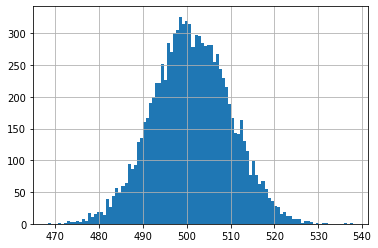

In [8]:
##Central limit theorem


population=pd.DataFrame()  ## Create a empty data frame

## Create a column that is 1000 random numbers drawn from a uniform distribution

population['numbers']= np.random.uniform(0,1000,size=10000)

population['numbers']

sampled_means=[] ## creating a list to store the sampled means

#For 10000 times
for i in range(0,10000):
    sampled_means.append(population['numbers'].sample(n=1000).mean()) #take a random sample of 1000 rows from the 
                                                                    #population, take the mean of those rows,append
                                                                    #append the sampled_means 
pd.Series(sampled_means).hist(bins=100)


population['numbers']

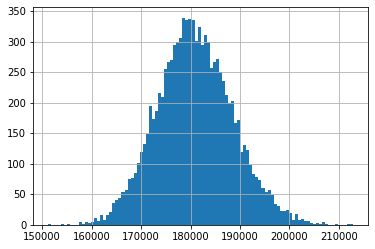

In [20]:
## central limit theorem for house price data
sampled_means_1=[]

for i in range(0,10000):
    sampled_means_1.append(house_price_df['SalePrice'].sample(n=100).mean())
pd.Series(sampled_means_1).hist(bins=100)